<a href="https://colab.research.google.com/github/scadriano/lia1_2024_1/blob/main/Construindo%20um%20modelo%20com%20TensorFlow%20-%20Fashion-Mnist/Aula_08_Construindo_um_modelo_com_TensorFlow_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow -  Fashion Mnist**

**Problema:** construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias de moda, sendo: *T-shirt/top; Trouser; Pullover; Dress; Coat; Sandal; Shirt; Sneaker; Bag; Ankle boot*.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O conjunto de dados [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) com 60.000 imagens em escala de cinza (28x28) de 10 categorias de moda, junto com um conjunto de teste de 10.000 imagens. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [1]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os dados de Treino e Teste**

In [18]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

In [23]:
# Classes das imagens
nomes_classes = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [24]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [25]:
# Função para exibir as imagens
def visualiza_imagens(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

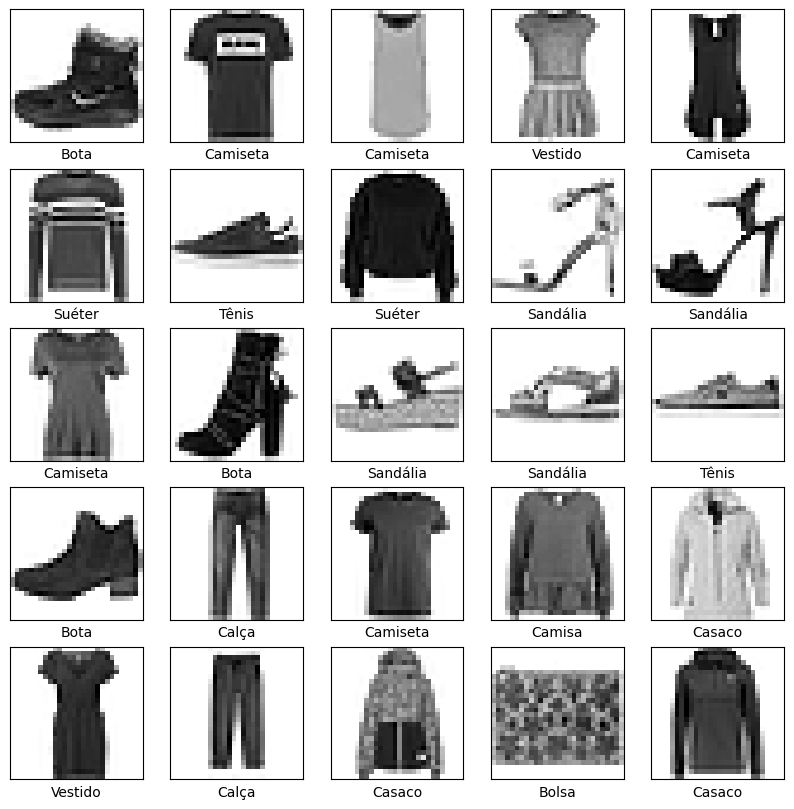

In [26]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino, nomes_classes)

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [32]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [33]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [34]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

**Treinamento**

In [35]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 15,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/15
1875/1875 [==============================] - 10s 4ms/step - loss: 1.1575 - accuracy: 0.5615 - val_loss: 0.8465 - val_accuracy: 0.6914
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7837 - accuracy: 0.7039 - val_loss: 0.7672 - val_accuracy: 0.7140
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7237 - accuracy: 0.7289 - val_loss: 0.7230 - val_accuracy: 0.7312
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6761 - accuracy: 0.7475 - val_loss: 0.6837 - val_accuracy: 0.7416
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6379 - accuracy: 0.7628 - val_loss: 0.6505 - val_accuracy: 0.7573
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6100 - accuracy: 0.7742 - val_loss: 0.6633 - val_accuracy: 0.7554
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5910 - accuracy: 0.7806 - val_loss: 0.6133 - val_accuracy

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Previsão - Testar o modelo (Deploy)**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

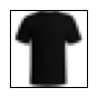

In [63]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/images/camiseta.jpg")

# Redimensiona para 28x28 pixels
# Converte para escala de cinza
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [64]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [65]:
# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [66]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 18ms/step


In [67]:
print(previsoes)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [68]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [69]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Suéter


Fim! 🔥